<a href="https://colab.research.google.com/github/RiaKokate/VIS/blob/main/vis_Py2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
Air pollution is a critical environmental and public health issue with significant economic and social consequences. This study aims to analyze the relationship between air quality (measured through AQI levels for CO, NO₂, O₃, and SO₂), mortality rates, population trends, and economic indicators across different regions and time periods. By integrating datasets from various sources, we investigate how air pollution correlates with health outcomes and socio-economic factors in the U.S. and globally.

# Research Questions
1. How does air pollution (CO, NO₂, O₃, SO₂ AQI levels) correlate with mortality rates across different regions and years?
2. What role does population density play in shaping AQI trends and health outcomes?
3. Does economic activity, measured through GDP and industry-specific outputs, influence air pollution levels?

# Hypotheses
1. H1: Higher AQI levels (particularly NO₂ and PM2.5) are associated with increased mortality rates.
2. H2: Regions with higher population densities exhibit worse air quality and a stronger relationship between pollution and mortality.
3. H3: Industrial activity contributes significantly to AQI variations, with economic growth influencing pollution trends.

# Data Sources
Open Data Soft World Pollution dataset: https://public.opendatasoft.com/explore/dataset/worldwide-pollution/table/?disjunctive.country&disjunctive.filename

Kaggle US Pollution dataset: https://www.kaggle.com/sogun3/uspollution

Socrata Sandbox Asthma dataset: https://bah.demo.socrata.com/Government/DATASET-Asthma-Chronic-Disease-Indicators/neii-ukbv

Center for Disease Control: https://www.cdc.gov/asthma/most_recent_data.htm

Bureau of Economic Analysis GDP and Personal Income (Regional Data):
https://apps.bea.gov/iTable/index_regional.cfm

Environment Protective Agency: https://www.epa.gov/

GMaps Module Documentaion: https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html#heatmaps
We integrate multiple datasets from different sources:

1. World Pollution Data (source: WHO) – Provides air pollution measures at the city and country level.
2. US PM2.5 & Mortality Data (source: CDC) – Offers mortality rates in relation to air pollution exposure.
3. State Population Data (source: US Census) – Includes state-wise population counts to analyze density effects.
3. Grouped State-Year AQI Data (source: EPA) – Aggregates AQI levels by state and year.
4. GDP & Personal Income Data (source: BEA) – Contains economic activity indicators at the national level.
5. AQI Dataset (source: NOAA) – Provides additional state-level AQI breakdowns.

# Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

! wget -q -O World_Pollution_df.csv https://docs.google.com/uc?id=1JpdFVP_FzLTTTB8yEB_FMhrl5E0OPJBK&export=download
! wget -q -O US_PM25_Mort_data.csv https://docs.google.com/uc?id=10UiPxQdsfKhw5VsykyIAdYFbQATFnLRf&export=download
! wget -q -O State_Population.csv https://docs.google.com/uc?id=1UXm-ty7hjxXBsqOCJOj77JuNOvX2-amk&export=download
! wget -q -O merged_set_data.csv https://docs.google.com/uc?id=1pF_hlqyPdGytXRZzI64ymVBGXRWlmzWw&export=download
! wget -q -O Group_State_then_Year.csv https://docs.google.com/uc?id=1aFOjy16ohZRLv0bcK3Qygg-y-RL6dY3Q&export=download
! wget -q -O GDP_and_Personal_Income.csv https://docs.google.com/uc?id=1ciYLaWJXZeiEsw_JAwyvBfIHWKU1y5by&export=download
! wget -q -O Chem_mean_by_Year.csv https://docs.google.com/uc?id=1XGJKQ3I1yod_S25tS-0W4VtqyH1hVFC6&export=download
! wget -q -O Chem_mean_by_State.csv https://docs.google.com/uc?id=1IGS0V59iO4JPL49L61-eCTZKoU1OMXbv&export=download
! wget -q -O AQI_data.csv https://docs.google.com/uc?id=1ZNHMmBq-jxtXrbq6PPE3cDp0P436yayK&export=download

data = pd.read_csv("merged_set_data.csv")
data.head()

,Unnamed: 0,Year,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Country,Variable,Unit,Value
0,0,2000,14.260908,9.540096,36.022688,30.969852,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,362.2790
1,1,2001,12.836909,8.792393,37.641191,31.310673,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,361.3241
2,2,2002,11.030905,8.486407,39.559160,29.363726,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,359.6222
3,3,2003,11.328351,8.246634,36.631114,28.334598,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,355.1779
4,4,2004,11.249550,7.411070,34.741209,26.940324,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,342.3452


In [2]:
pollution = pd.read_csv("World_Pollution_df.csv")
pollution.head()

,Unnamed: 0,City,Country,Latitude,Longitude,Value CO,Value NO2,Value O3,Value PM25
0,0,Tandil,Argentina,-37.321674,-59.133164,0,0,17,7
1,1,Ushuaia,Argentina,-54.800000,-68.300000,0,0,12,4
2,2,Villazon,Argentina,-22.100000,-65.600000,0,0,5,5
3,3,Mendoza,Argentina,-32.890845,-68.827171,1,8,11,54
4,4,Tandil,Argentina,-37.321674,-59.133164,0,0,23,23


In [3]:
pm = pd.read_csv("US_PM25_Mort_data.csv")
pm.head()

,Country,Variable,Year,Unit,Value
0,United States,Mortality from exposure to outdoor PM2.5,1990,Per 1 000 000 inhabitants,372.6680
1,United States,Mortality from exposure to outdoor PM2.5,1991,Per 1 000 000 inhabitants,371.3994
2,United States,Mortality from exposure to outdoor PM2.5,1992,Per 1 000 000 inhabitants,367.1144
3,United States,Mortality from exposure to outdoor PM2.5,1993,Per 1 000 000 inhabitants,375.3801
4,United States,Mortality from exposure to outdoor PM2.5,1994,Per 1 000 000 inhabitants,373.4384


In [4]:
pop = pd.read_csv("State_Population.csv")
pop.head()

,Unnamed: 0,Year,Year Pullutant Average,Year Mort Count,Alabama Population,Alaska Population,Arizona Population,Arkansas Population,California Population,Colorado Population,...,Texas Population,Utah Population,Vermont Population,Virginia Population,Washington Population,"Washington, DC Population",West Virginia Population,Wisconsin Population,Wyoming Population,Total US Population Estimate
0,0,2010,0.091656,306.2926,4712651.0,691189.0,6246816.0,2872684.0,36637290.0,4887061.0,...,24311891.0,2657236.0,624258.0,7841754.0,6561297.0,584400.0,1840802.0,5637947.0,545579.0,307727594.0
1,1,2011,0.087565,316.7458,4747424.0,700703.0,6337373.0,2895928.0,36969200.0,4966061.0,...,24774187.0,2715379.0,624958.0,7926192.0,6652845.0,593955.0,1846372.0,5664893.0,554697.0,310346358.0
2,2,2012,0.084872,298.2415,4777326.0,711139.0,6410979.0,2916372.0,37325068.0,5042853.0,...,25208897.0,2766233.0,625498.0,8014955.0,6738714.0,605759.0,1850481.0,5687219.0,562803.0,312855438.0
3,3,2013,0.078813,291.0552,4799277.0,720316.0,6479703.0,2933369.0,37659181.0,5119329.0,...,25639373.0,2813673.0,625904.0,8100653.0,6819579.0,619371.0,1853619.0,5706871.0,570134.0,315219560.0
4,4,2014,0.078189,277.7249,4817678.0,728300.0,6561516.0,2947036.0,38066920.0,5197580.0,...,26092033.0,2858111.0,626358.0,8185131.0,6899123.0,633736.0,1853881.0,5724692.0,575251.0,317746049.0


In [5]:
state = pd.read_csv("Group_State_then_Year.csv")
state.head()

,State,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average
0,Alabama,2013,0.012066,0.012099,0.000772,0.211873,6.580645,4.129032,18.903226,21.387097,0.059202
1,Alabama,2014,0.009412,0.024633,0.001198,0.206144,7.956954,3.715232,36.947020,21.486755,0.060347
2,Alabama,2015,0.009079,0.024000,0.001028,0.221390,6.950000,3.933333,37.343333,20.026667,0.063874
3,Alabama,2016,0.009525,0.028348,0.000859,0.210097,5.275168,3.906040,39.295302,23.093960,0.062207
4,Alaska,2014,0.011659,0.010307,0.005956,0.455232,14.000000,6.983240,15.206704,21.167598,0.120788


In [6]:
GDP = pd.read_csv("GDP_and_Personal_Income.csv")
GDP.head()

,Year,Total Industry,"Agriculture, forestry, fishing, and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services",Other services (except government and government enterprises),Federal civilian,Military,State and local
0,2000,10.25,0.10,0.11,0.18,0.46,1.55,0.62,0.69,0.31,0.47,1.97,1.11,0.70,0.39,0.28,0.25,0.18,0.90
1,2001,10.58,0.10,0.12,0.18,0.49,1.47,0.61,0.71,0.31,0.50,2.13,1.16,0.75,0.39,0.27,0.25,0.18,0.96
2,2002,10.94,0.10,0.11,0.18,0.49,1.47,0.61,0.73,0.31,0.55,2.22,1.19,0.81,0.41,0.28,0.27,0.19,1.01
3,2003,11.46,0.11,0.14,0.18,0.53,1.52,0.64,0.77,0.32,0.56,2.30,1.25,0.86,0.43,0.28,0.28,0.21,1.05
4,2004,12.21,0.14,0.17,0.20,0.58,1.61,0.70,0.80,0.35,0.62,2.39,1.34,0.93,0.46,0.30,0.30,0.23,1.11


In [7]:
chemY = pd.read_csv("Chem_mean_by_Year.csv")
chemY.head()

,Year,SO2 AQI,CO AQI,O3 AQI,NO2 AQI
0,2000,14.260908,9.540096,36.022688,30.969852
1,2001,12.836909,8.792393,37.641191,31.310673
2,2002,11.030905,8.486407,39.559160,29.363726
3,2003,11.328351,8.246634,36.631114,28.334598
4,2004,11.249550,7.411070,34.741209,26.940324


In [8]:
chem = pd.read_csv("Chem_mean_by_State.csv")
chem.head()

,Year,State,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,State Average
0,2000,Arizona,7.479545,15.169318,39.042045,47.127273,27.204545
1,2000,California,6.045758,11.268912,32.716142,29.993447,20.006065
2,2000,Colorado,21.509589,11.558904,27.553425,32.753425,23.343836
3,2000,District Of Columbia,24.774725,18.563187,27.956044,37.296703,27.147665
4,2000,Florida,7.556180,10.342697,39.219101,25.573034,20.672753


In [9]:
aqi = pd.read_csv("AQI_data.csv")
aqi.head()

,Unnamed: 0,State Code,County Code,State,County,City,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,1,4,13,Arizona,Maricopa,Phoenix,2000,46,34,13.0,25.0
1,5,4,13,Arizona,Maricopa,Phoenix,2000,34,27,4.0,26.0
2,9,4,13,Arizona,Maricopa,Phoenix,2000,48,14,16.0,28.0
3,13,4,13,Arizona,Maricopa,Phoenix,2000,72,28,23.0,34.0
4,17,4,13,Arizona,Maricopa,Phoenix,2000,58,10,21.0,42.0


In [10]:
print("Merged Set Data Columns:", data.columns)
print("World Pollution Columns:", pollution.columns)
print("US PM2.5 Mortality Data Columns:", pm.columns)
print("State Population Columns:", pop.columns)
print("Group State Then Year Columns:", state.columns)
print("GDP and Personal Income Columns:", GDP.columns)
print("AQI Data Columns:", aqi.columns)

Merged Set Data Columns: Index(['Unnamed: 0', 'Year', 'SO2 AQI', 'CO AQI', 'O3 AQI', 'NO2 AQI',
       'Country', 'Variable', 'Unit', 'Value'],
      dtype='object')
World Pollution Columns: Index(['Unnamed: 0', 'City', 'Country', 'Latitude', 'Longitude', 'Value CO',
       'Value NO2', 'Value O3', 'Value PM25'],
      dtype='object')
US PM2.5 Mortality Data Columns: Index(['Country', 'Variable', 'Year', 'Unit', 'Value'], dtype='object')
State Population Columns: Index(['Unnamed: 0', 'Year', 'Year Pullutant Average', 'Year Mort Count',
       'Alabama Population', 'Alaska Population', 'Arizona Population',
       'Arkansas Population', 'California Population', 'Colorado Population',
       'Connecticut Population', 'Delaware Population', 'Florida Population',
       'Georgia Population', 'Hawaii Population', 'Idaho Population',
       'Illinois Population', 'Indiana Population', 'Iowa Population',
       'Kansas Population', 'Kentucky Population', 'Louisiana Population',
       'Maine 

# Merging Dataset

In [11]:
# Rename columns for consistency
data.rename(columns={'SO2 AQI': 'SO2_AQI', 'CO AQI': 'CO_AQI', 'O3 AQI': 'O3_AQI', 'NO2 AQI': 'NO2_AQI'}, inplace=True)
aqi.rename(columns={'SO2 AQI': 'SO2_AQI', 'CO AQI': 'CO_AQI', 'O3 AQI': 'O3_AQI', 'NO2 AQI': 'NO2_AQI'}, inplace=True)
pm.rename(columns={'Variable': 'Mortality_Variable', 'Value': 'Mortality_Value'}, inplace=True)
pop.rename(columns={'Year Pullutant Average': 'Pollutant_Year_Avg', 'Year Mort Count': 'Mortality_Year'}, inplace=True)
state.rename(columns={'NO2 Mean': 'NO2_Mean', 'O3 Mean': 'O3_Mean'}, inplace=True)

aqi.rename(columns={'nnamed: 0': 'ID'}, inplace=True)

# Replace values where necessary
pop.replace({'Washington, DC Population': 'DC Population'}, inplace=True)
GDP.replace({'Total Industry': 'Total_Industry_GDP'}, inplace=True)
aqi_data = aqi[['State', 'Year', 'NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']]

# Merge datasets
merged_df1 = data.merge(pm, on=['Year', 'Country'], how='inner')
merged_df2 = merged_df1.merge(pop, on=['Year'], how='left')

# Second merge with economic and AQI data
grouped_aqi = state.merge(GDP, on=['Year'], how='left')
final_df = grouped_aqi.merge(aqi_data, on=['Year', 'State'], how='inner')

# Collapse data by grouping and aggregating
final_df = final_df.groupby(['State', 'Year']).agg({
    'NO2_AQI': 'mean', 'O3_AQI': 'mean', 'SO2_AQI': 'mean', 'CO_AQI': 'mean',
    'Total Industry': 'sum'
}).reset_index()

In [12]:
grouped_aqi.head()

,State,Year,NO2_Mean,O3_Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,...,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services",Other services (except government and government enterprises),Federal civilian,Military,State and local
0,Alabama,2013,0.012066,0.012099,0.000772,0.211873,6.580645,4.129032,18.903226,21.387097,...,0.49,0.83,3.32,2.02,1.45,0.65,0.36,0.39,0.32,1.51
1,Alabama,2014,0.009412,0.024633,0.001198,0.206144,7.956954,3.715232,36.947020,21.486755,...,0.52,0.84,3.55,2.12,1.49,0.69,0.38,0.40,0.31,1.56
2,Alabama,2015,0.009079,0.024000,0.001028,0.221390,6.950000,3.933333,37.343333,20.026667,...,0.56,0.92,3.75,2.23,1.56,0.74,0.39,0.42,0.31,1.61
3,Alabama,2016,0.009525,0.028348,0.000859,0.210097,5.275168,3.906040,39.295302,23.093960,...,0.58,1.00,3.93,2.30,1.64,0.77,0.40,0.44,0.31,1.64
4,Alaska,2014,0.011659,0.010307,0.005956,0.455232,14.000000,6.983240,15.206704,21.167598,...,0.52,0.84,3.55,2.12,1.49,0.69,0.38,0.40,0.31,1.56


In [13]:
final_df.head()

,State,Year,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI,Total Industry
0,Alabama,2013,21.387097,18.903226,6.580645,4.129032,520.18
1,Alabama,2014,21.486755,36.947020,7.956954,3.715232,5291.04
2,Alabama,2015,20.026667,37.343333,6.950000,3.933333,5466.00
3,Alabama,2016,23.093960,39.295302,5.275168,3.906040,2787.79
4,Alaska,2014,21.167598,15.206704,14.000000,6.983240,3136.08


In [14]:
print("grouped_aqi Data Columns:", grouped_aqi.columns)

grouped_aqi Data Columns: Index(['State', 'Year', 'NO2_Mean', 'O3_Mean', 'SO2 Mean', 'CO Mean',
       'SO2 AQI', 'CO AQI', 'O3 AQI', 'NO2 AQI', 'Year Average',
       'Total Industry', 'Agriculture, forestry, fishing, and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance, insurance, real estate, rental, and leasing',
       'Professional and business services',
       'Educational services, health care, and social assistance',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Other services (except government and government enterprises)',
       'Federal civilian', 'Military', 'State and local'],
      dtype='object')


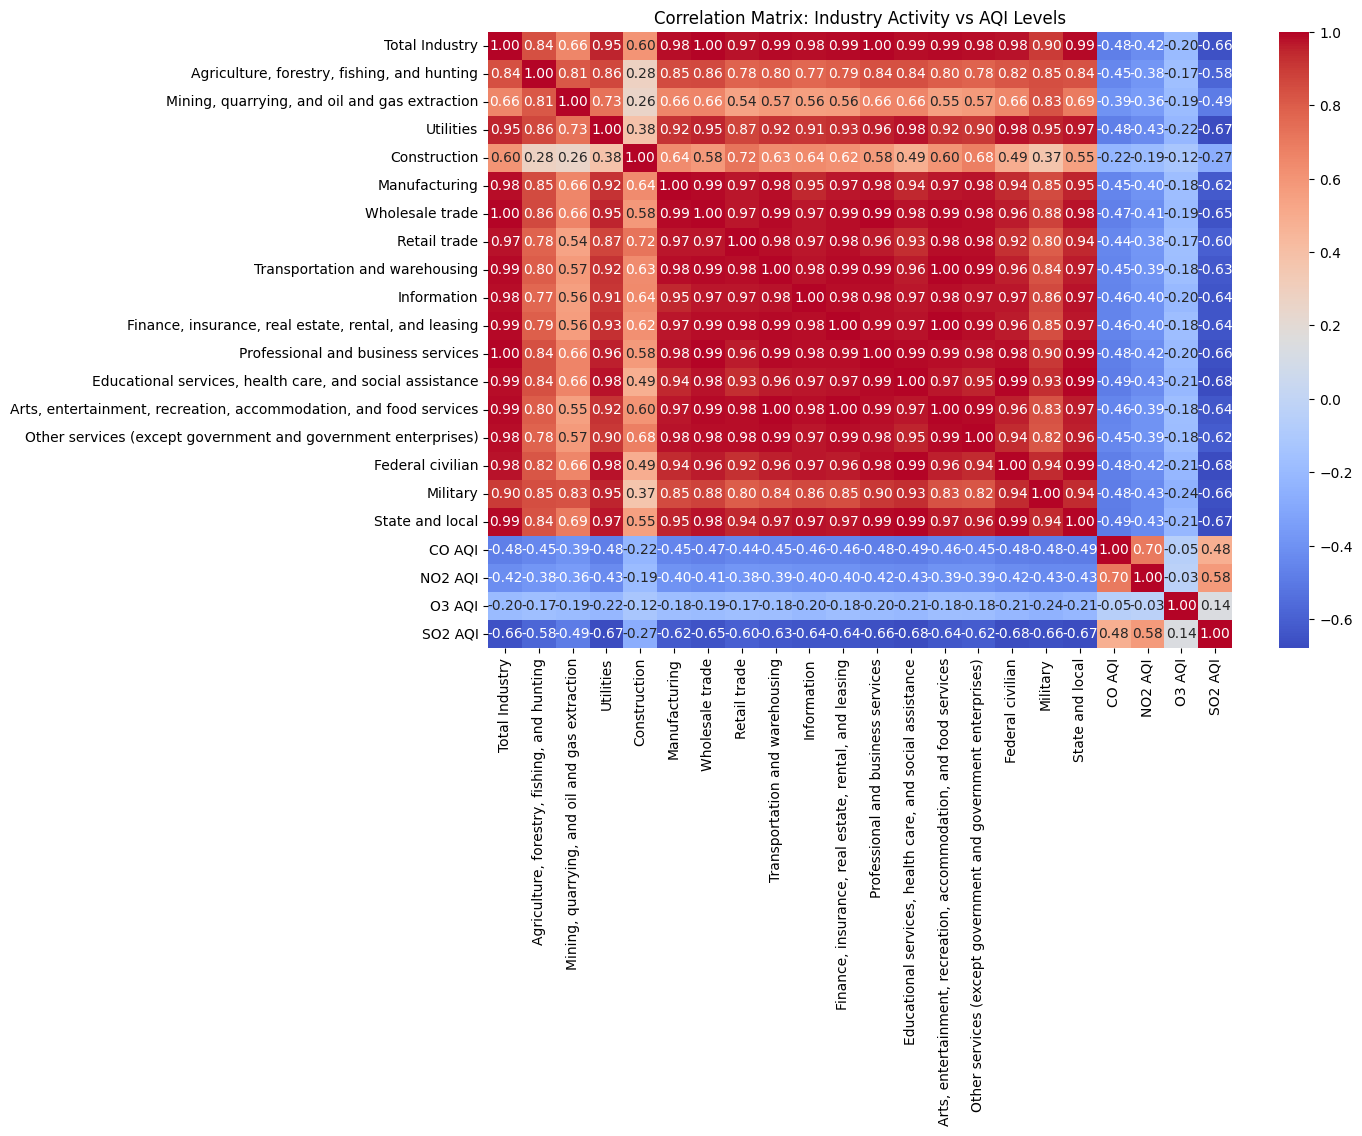

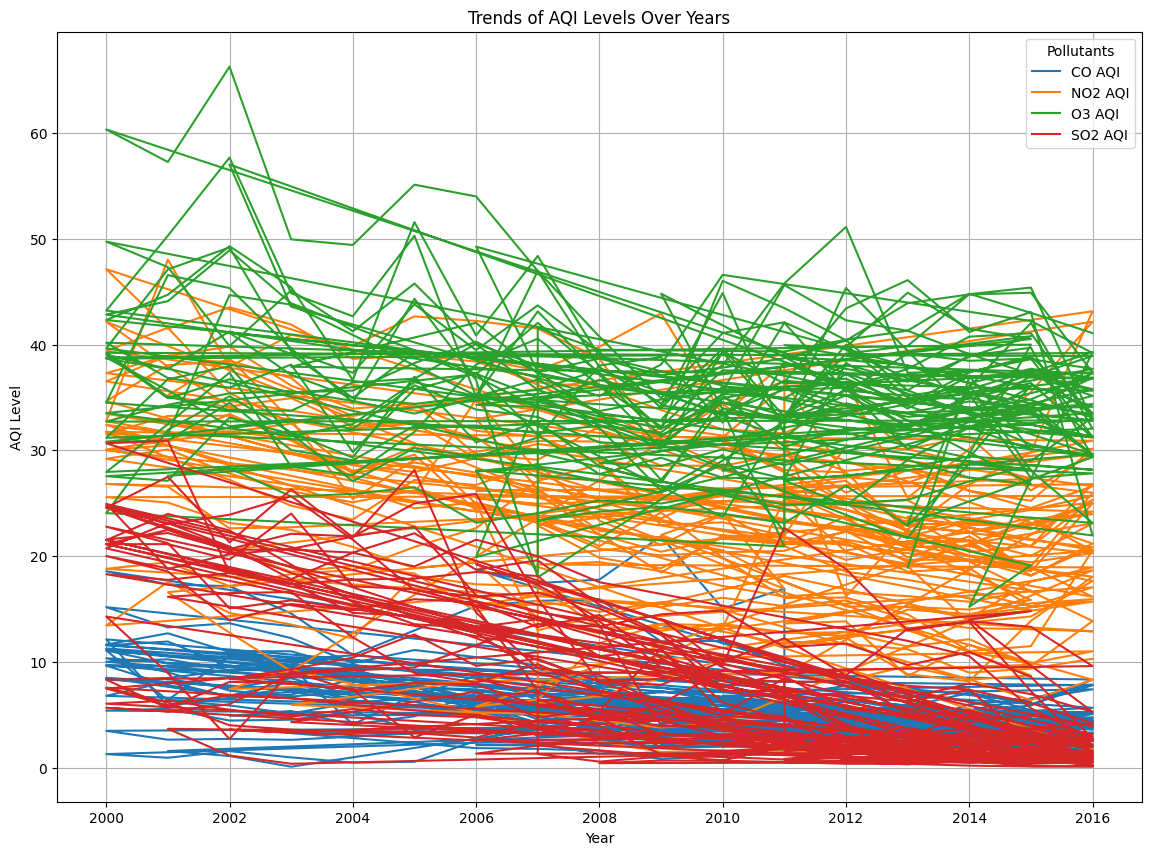

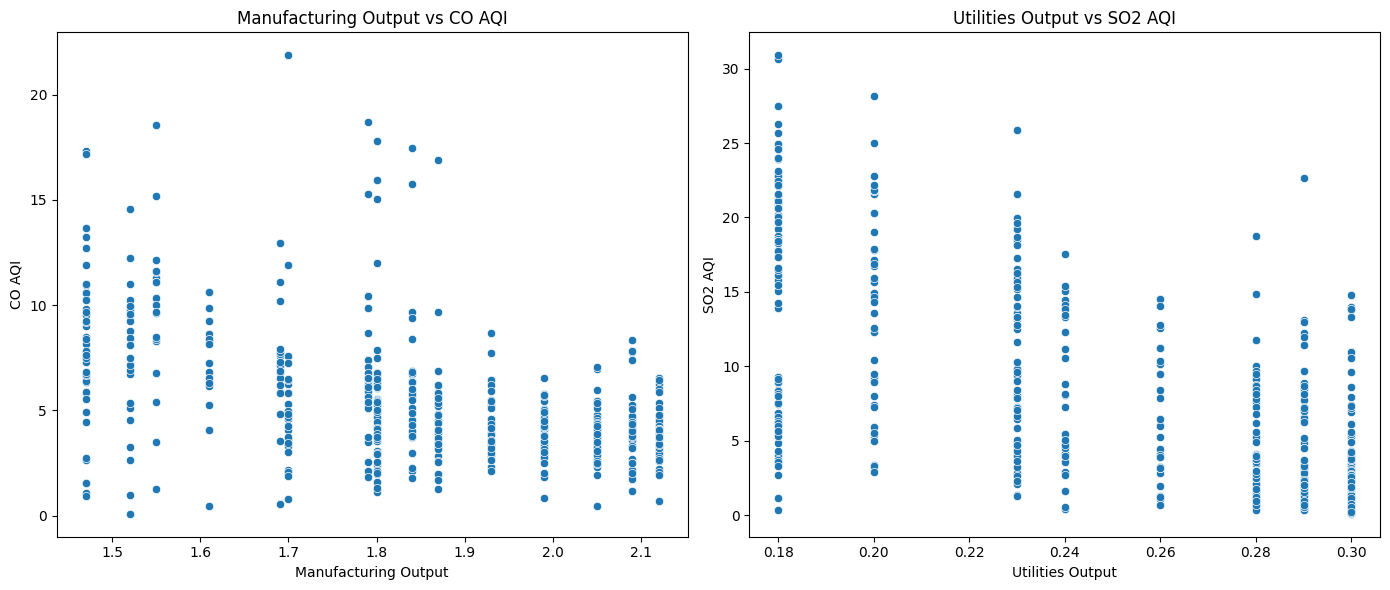

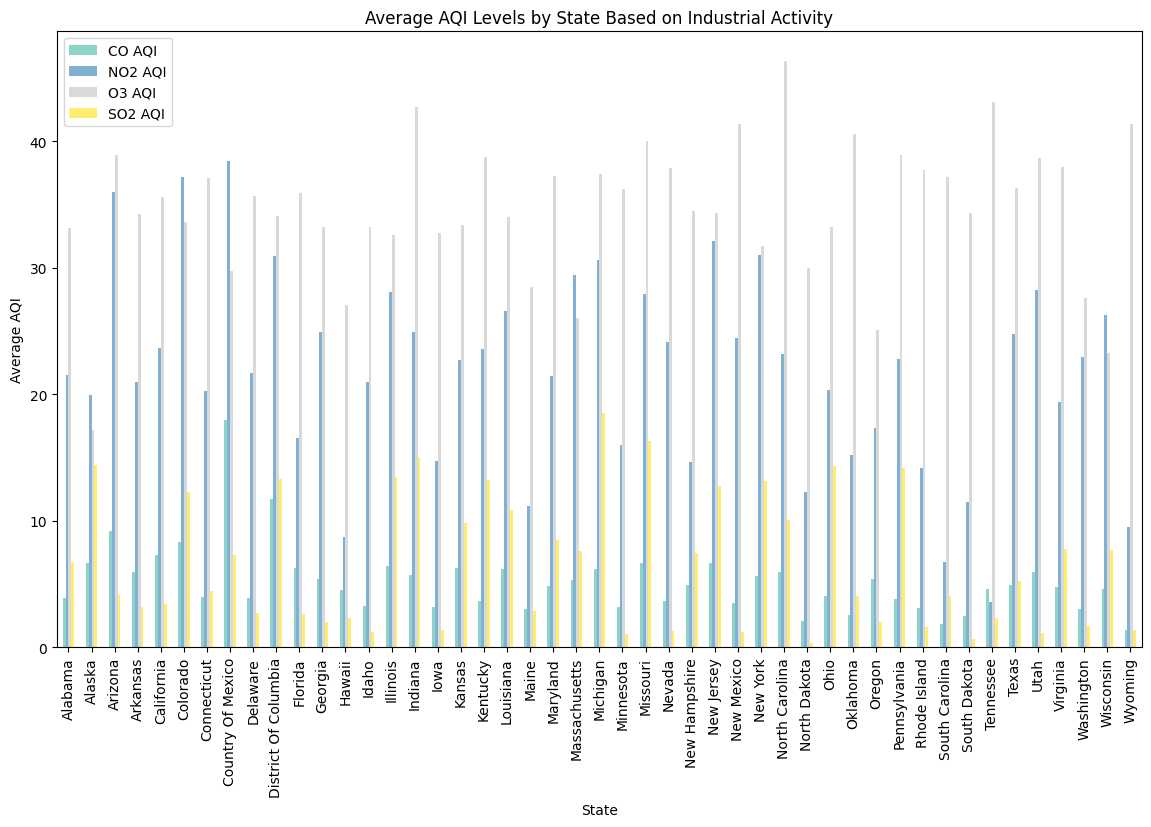

In [15]:
# Research Question 1: Correlation between economic activity and AQI levels
# Create a correlation matrix for AQI and industry sectors
industry_columns = ['Total Industry', 'Agriculture, forestry, fishing, and hunting',
                    'Mining, quarrying, and oil and gas extraction', 'Utilities',
                    'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
                    'Transportation and warehousing', 'Information',
                    'Finance, insurance, real estate, rental, and leasing',
                    'Professional and business services',
                    'Educational services, health care, and social assistance',
                    'Arts, entertainment, recreation, accommodation, and food services',
                    'Other services (except government and government enterprises)',
                    'Federal civilian', 'Military', 'State and local']

aqi_columns = ['CO AQI', 'NO2 AQI', 'O3 AQI', 'SO2 AQI']

# Combine the industry columns with AQI columns for correlation
correlation_data = grouped_aqi[industry_columns + aqi_columns]
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix: Industry Activity vs AQI Levels")
plt.show()

# Research Question 2: AQI Trends by State and Year
# Plot AQI levels over time for different pollutants
plt.figure(figsize=(14, 10))
for pollutant in aqi_columns:
    plt.plot(grouped_aqi['Year'], grouped_aqi[pollutant], label=pollutant)
plt.title("Trends of AQI Levels Over Years")
plt.xlabel("Year")
plt.ylabel("AQI Level")
plt.legend(title="Pollutants")
plt.grid(True)
plt.show()

# Research Question 3: Industry Output vs SO2/CO AQI
# Scatter plot of industry output against CO AQI for Manufacturing and SO2 AQI for Utilities
plt.figure(figsize=(14, 6))

# Scatter for Manufacturing vs CO AQI
plt.subplot(1, 2, 1)
sns.scatterplot(x='Manufacturing', y='CO AQI', data=grouped_aqi)
plt.title("Manufacturing Output vs CO AQI")
plt.xlabel("Manufacturing Output")
plt.ylabel("CO AQI")

# Scatter for Utilities vs SO2 AQI
plt.subplot(1, 2, 2)
sns.scatterplot(x='Utilities', y='SO2 AQI', data=grouped_aqi)
plt.title("Utilities Output vs SO2 AQI")
plt.xlabel("Utilities Output")
plt.ylabel("SO2 AQI")

plt.tight_layout()
plt.show()

# Research Question 4: Total Industry Activity vs AQI and Asthma Mortality
# Create a scatter matrix to analyze Total Industry activity vs AQI levels and asthma mortality
from pandas.plotting import scatter_matrix


# Research Question 5: Industrial Activity and AQI by State
# Bar plot showing the average AQI levels for each state based on different industry outputs
# Grouping by state and plotting
average_aqi_by_state = grouped_aqi.groupby('State')[aqi_columns].mean()

# Plotting the average AQI by state
average_aqi_by_state.plot(kind='bar', figsize=(14, 8), colormap='Set3')
plt.title("Average AQI Levels by State Based on Industrial Activity")
plt.xlabel("State")
plt.ylabel("Average AQI")
plt.xticks(rotation=90)
plt.show()

# ASTHAMA

In [16]:
! wget -q -O asthma_mort_states_2016.csv https://docs.google.com/uc?id=1n85AihPWa5rwYd287z5vfjPuNRE84qxM&export=download
asthma = pd.read_csv("asthma_mort_states_2016.csv")
asthma.head()

,Unnamed: 0,LocationDesc,2010,2011,2012,2013,2014,2015,2016
0,0,Alabama,61,36,57,42,57,52,48
1,1,Alaska,,,,,,NaN,NaN
2,2,Arizona,58,92,80,98,86,76,108
3,3,Arkansas,37,46,30,36,33,30,45
4,4,California,403,403,384,410,407,393,391


In [31]:
# Remove commas from the dataset
#asthma.iloc[:, 2:] = asthma.iloc[:, 2:].replace({',': ''}, regex=True)

# Convert the relevant columns (excluding LocationDesc) to float
#asthma.iloc[:, 2:] = asthma.iloc[:, 2:].astype(float)

# Display the first few rows
#asthma.head()

In [18]:
# Replace empty strings with NaN
asthma.replace(' ', float('nan'), inplace=True)

# Convert the relevant columns (excluding LocationDesc) to float
asthma.iloc[:, 2:] = asthma.iloc[:, 2:].astype(float)

# Display the first few rows
asthma.head()

,Unnamed: 0,LocationDesc,2010,2011,2012,2013,2014,2015,2016
0,0,Alabama,61.0,36.0,57.0,42.0,57.0,52.0,48.0
1,1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Arizona,58.0,92.0,80.0,98.0,86.0,76.0,108.0
3,3,Arkansas,37.0,46.0,30.0,36.0,33.0,30.0,45.0
4,4,California,403.0,403.0,384.0,410.0,407.0,393.0,391.0


In [19]:
#2)melt year columns to average asthma mortality in every state
asthma_melted_df=pd.melt(asthma, id_vars=['LocationDesc'], value_vars=['2010','2011','2012','2013','2014','2015','2016'])
asthma_melted_df.head()

,LocationDesc,variable,value
0,Alabama,2010,61.0
1,Alaska,2010,NaN
2,Arizona,2010,58.0
3,Arkansas,2010,37.0
4,California,2010,403.0


In [20]:
#rename columns
asthma_melted_df = asthma_melted_df.rename(index=str, columns={"LocationDesc": "State", "variable": "Year", "value":"Asthma Mortality"})
asthma_melted_df.head()
asthma_melted_df.to_csv('asthma_mort_states_melted.csv', index=True, header=True)
asthma_melted_df.head()

,State,Year,Asthma Mortality
0,Alabama,2010,61.0
1,Alaska,2010,NaN
2,Arizona,2010,58.0
3,Arkansas,2010,37.0
4,California,2010,403.0


In [21]:
# calculate mean asthma mortality of 2010-2016 by state
Avg_asthma_byState = pd.DataFrame(asthma_melted_df.groupby("State")["Asthma Mortality"].mean())
Avg_asthma_byState.head()

,Asthma Mortality
State,
Alabama,50.428571
Alaska,NaN
Arizona,85.428571
Arkansas,36.714286
California,398.714286


In [22]:
chemfilt = aqi[['State', 'Year','NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']]
chemfilt.head()

,State,Year,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
0,Arizona,2000,46,34,13.0,25.0
1,Arizona,2000,34,27,4.0,26.0
2,Arizona,2000,48,14,16.0,28.0
3,Arizona,2000,72,28,23.0,34.0
4,Arizona,2000,58,10,21.0,42.0


In [23]:
chemfilt['Year']=chemfilt['Year'].astype('str')
chemfilt.dtypes
chemfilt=chemfilt[chemfilt['Year'].str.contains('2010|2011|2012|2013|2014|2015|2016')]
chemfilt.head()

<ipython-input-23-12cb61cf7b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chemfilt['Year']=chemfilt['Year'].astype('str')


,State,Year,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
242220,Arizona,2010,45,29,9.0,18.0
242221,Arizona,2010,48,21,10.0,15.0
242222,Arizona,2010,52,24,9.0,16.0
242223,Arizona,2010,52,31,13.0,15.0
242224,Arizona,2010,57,25,13.0,15.0


In [24]:
# 6)merge asthma mortality data with pollt AQIs
merge_final_df = pd.merge(chemfilt, Avg_asthma_byState, on =['State'])

merge_final_df.head()

,State,Year,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI,Asthma Mortality
0,Arizona,2010,45,29,9.0,18.0,85.428571
1,Arizona,2010,48,21,10.0,15.0,85.428571
2,Arizona,2010,52,24,9.0,16.0,85.428571
3,Arizona,2010,52,31,13.0,15.0,85.428571
4,Arizona,2010,57,25,13.0,15.0,85.428571


In [25]:
# Group by 'Year' and calculate the mean for selected columns
avg_AQI_asthm_byYear_df = pd.DataFrame(merge_final_df.groupby('Year')[['Asthma Mortality', 'NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']].mean())

# Reset the index
avg_AQI_asthm_byYear_df.reset_index(inplace=True)

# Display the result
avg_AQI_asthm_byYear_df

,Year,Asthma Mortality,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
0,2010,206.560239,21.619048,34.873952,4.238372,4.898750
1,2011,190.952421,21.011178,34.924529,4.145762,4.677056
2,2012,176.846929,20.263957,35.646491,3.326040,4.530803
3,2013,181.925039,19.820931,35.963944,2.978427,4.269331
4,2014,177.620775,19.394214,36.922203,3.035975,4.226896
5,2015,174.386577,18.347113,37.239121,2.528072,4.322438
6,2016,173.865554,20.020997,33.687992,2.186680,4.454396


In [26]:
# rearrange DF by state to look for any corr (asthma mort/pollts) by state

merge_final_df.head()

statesummary=pd.DataFrame(merge_final_df.melt(id_vars=['Year','State']).groupby(['State','variable'])['value'].mean())
statesummary=statesummary.reset_index()
statesummary.head()
statesummary.pivot(index='State',columns='variable')
statesummary
statesummary2=pd.DataFrame(statesummary.pivot_table(index=['State'], columns='variable'))
statesummary2.columns = ['_'.join(tup).rstrip('_') for tup in statesummary2.columns.values]
statesummary2.reset_index(inplace=True)
statesummary2.head()

,State,value_Asthma Mortality,value_CO_AQI,value_NO2_AQI,value_O3_AQI,value_SO2_AQI
0,Alabama,50.428571,3.851662,21.2289,36.831202,7.005115
1,Alaska,NaN,6.52834,19.580972,17.712551,14.506073
2,Arizona,85.428571,6.410256,30.883507,41.481798,2.345046
3,Arkansas,36.714286,5.774202,21.624402,35.323898,2.668993
4,California,398.714286,5.53418,20.346237,37.311622,1.515042


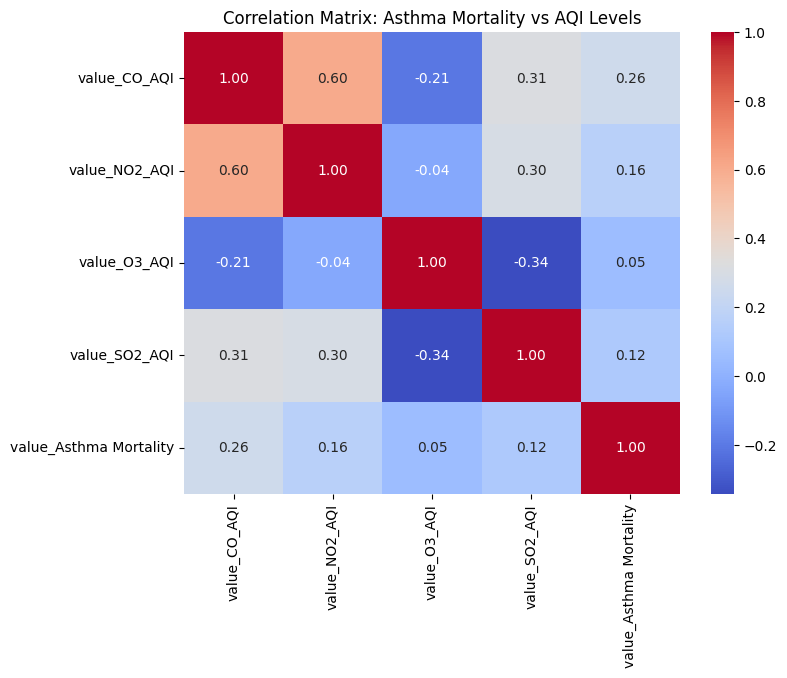

<ipython-input-27-ab11314270f2>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pollutant', y='AQI', data=melted_df, palette="Set2")


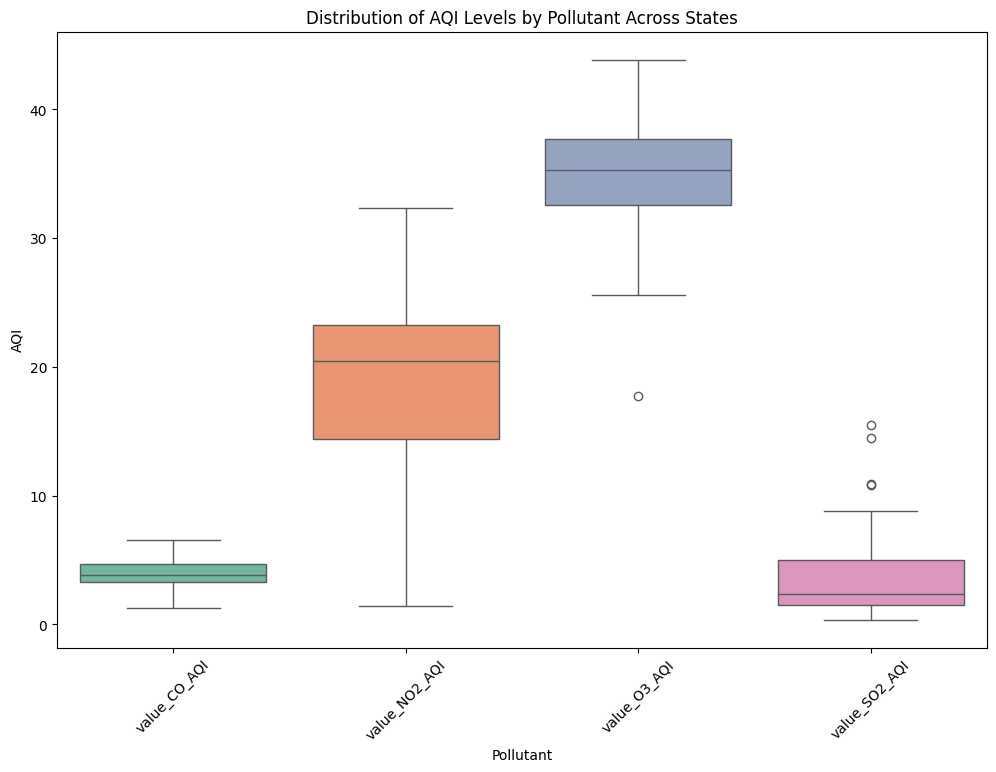

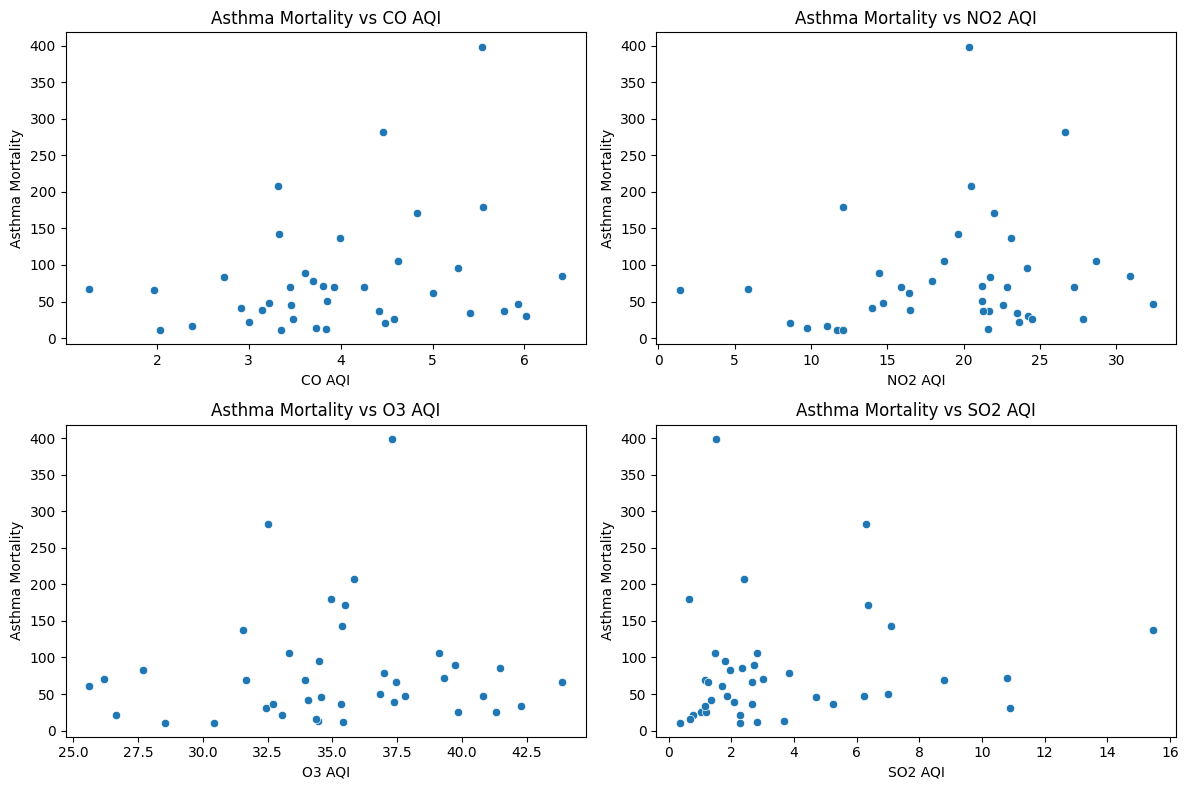

In [27]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming `statesummary2` is the DataFrame with columns: 'State', 'value_Asthma Mortality', 'value_CO_AQI', 'value_NO2_AQI', 'value_O3_AQI', 'value_SO2_AQI'

# Research Question 1: Correlation between Asthma Mortality and AQI levels
# Create a correlation matrix between asthma mortality and the AQI levels for different pollutants

aqi_columns = ['value_CO_AQI', 'value_NO2_AQI', 'value_O3_AQI', 'value_SO2_AQI']
correlation_matrix = statesummary2[aqi_columns + ['value_Asthma Mortality']].corr()

# Visualization: Heatmap of correlations between asthma mortality and AQI levels
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix: Asthma Mortality vs AQI Levels")
plt.show()

# Research Question 2: Comparison of AQI levels across states
# Visualizing AQI levels for each pollutant across different states
melted_df = pd.melt(statesummary2, id_vars=["State"], value_vars=aqi_columns,
                    var_name="Pollutant", value_name="AQI")

# Boxplot to visualize AQI levels by state for each pollutant
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pollutant', y='AQI', data=melted_df, palette="Set2")
plt.title("Distribution of AQI Levels by Pollutant Across States")
plt.xlabel("Pollutant")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()

# Research Question 3: Asthma Mortality vs AQI for different pollutants
# Scatter plot of asthma mortality vs AQI for each pollutant
plt.figure(figsize=(12, 8))

# Scatter for CO AQI vs Asthma Mortality
plt.subplot(2, 2, 1)
sns.scatterplot(x='value_CO_AQI', y='value_Asthma Mortality', data=statesummary2)
plt.title("Asthma Mortality vs CO AQI")
plt.xlabel("CO AQI")
plt.ylabel("Asthma Mortality")

# Scatter for NO2 AQI vs Asthma Mortality
plt.subplot(2, 2, 2)
sns.scatterplot(x='value_NO2_AQI', y='value_Asthma Mortality', data=statesummary2)
plt.title("Asthma Mortality vs NO2 AQI")
plt.xlabel("NO2 AQI")
plt.ylabel("Asthma Mortality")

# Scatter for O3 AQI vs Asthma Mortality
plt.subplot(2, 2, 3)
sns.scatterplot(x='value_O3_AQI', y='value_Asthma Mortality', data=statesummary2)
plt.title("Asthma Mortality vs O3 AQI")
plt.xlabel("O3 AQI")
plt.ylabel("Asthma Mortality")

# Scatter for SO2 AQI vs Asthma Mortality
plt.subplot(2, 2, 4)
sns.scatterplot(x='value_SO2_AQI', y='value_Asthma Mortality', data=statesummary2)
plt.title("Asthma Mortality vs SO2 AQI")
plt.xlabel("SO2 AQI")
plt.ylabel("Asthma Mortality")

plt.tight_layout()
plt.show()

# Save the correlation matrix if needed
# correlation_matrix.to_csv('correlation_matrix.csv', index=True)

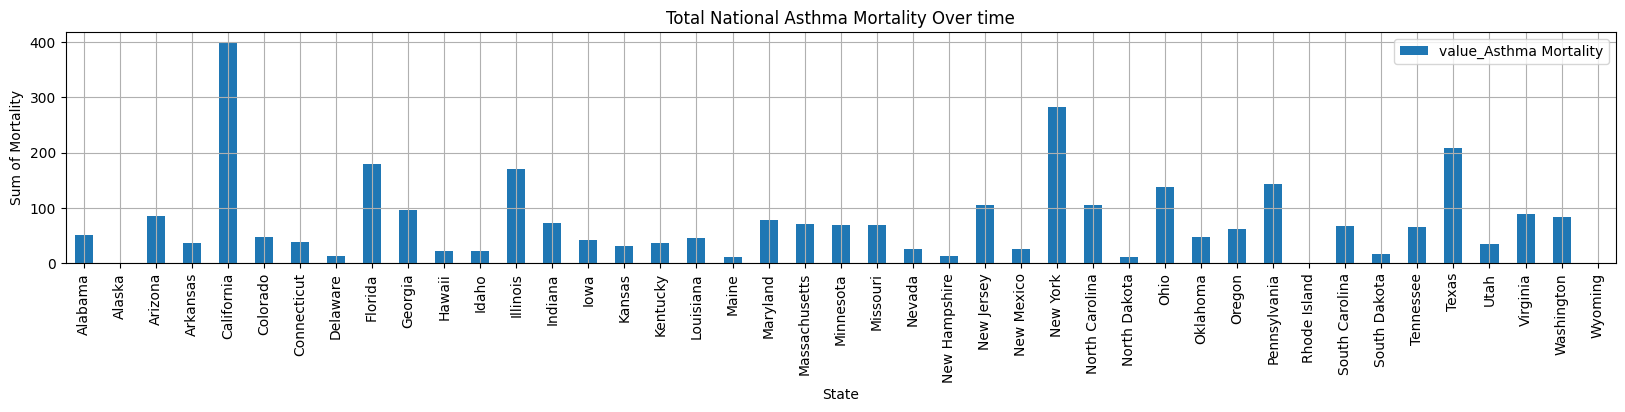

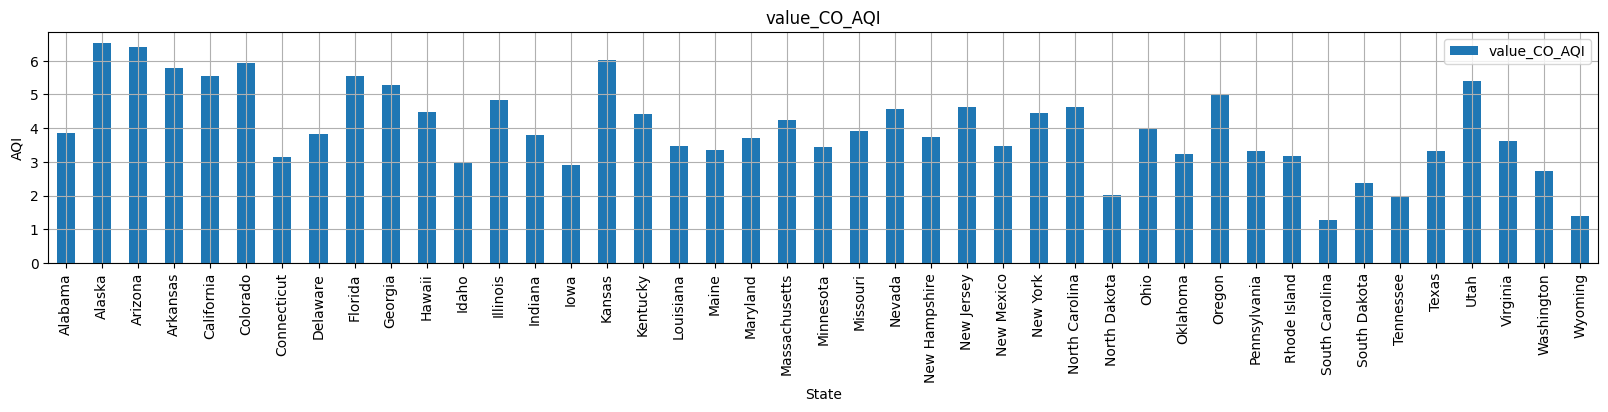

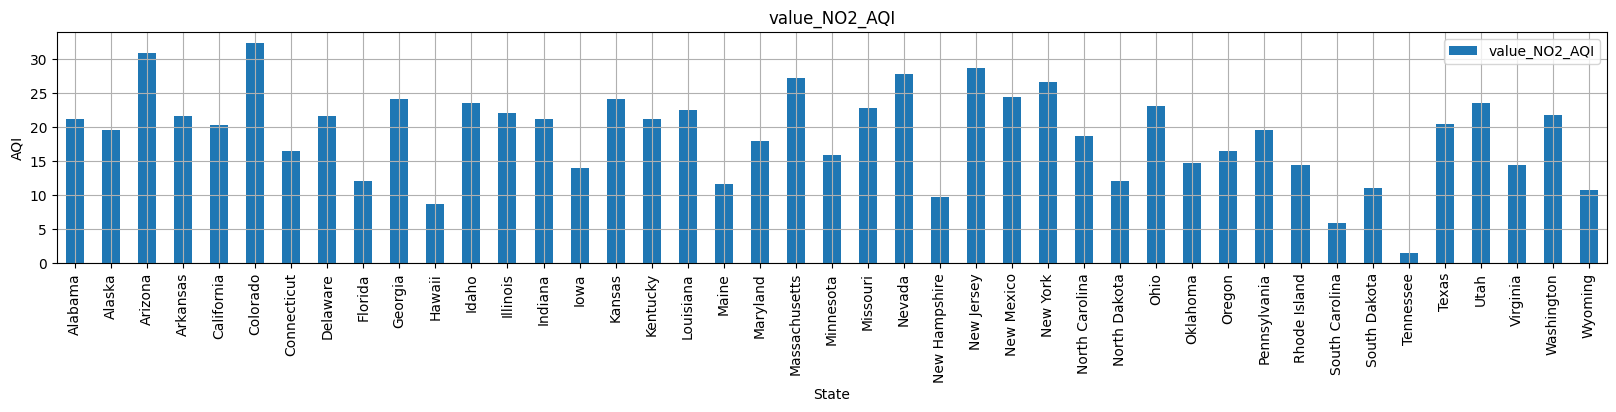

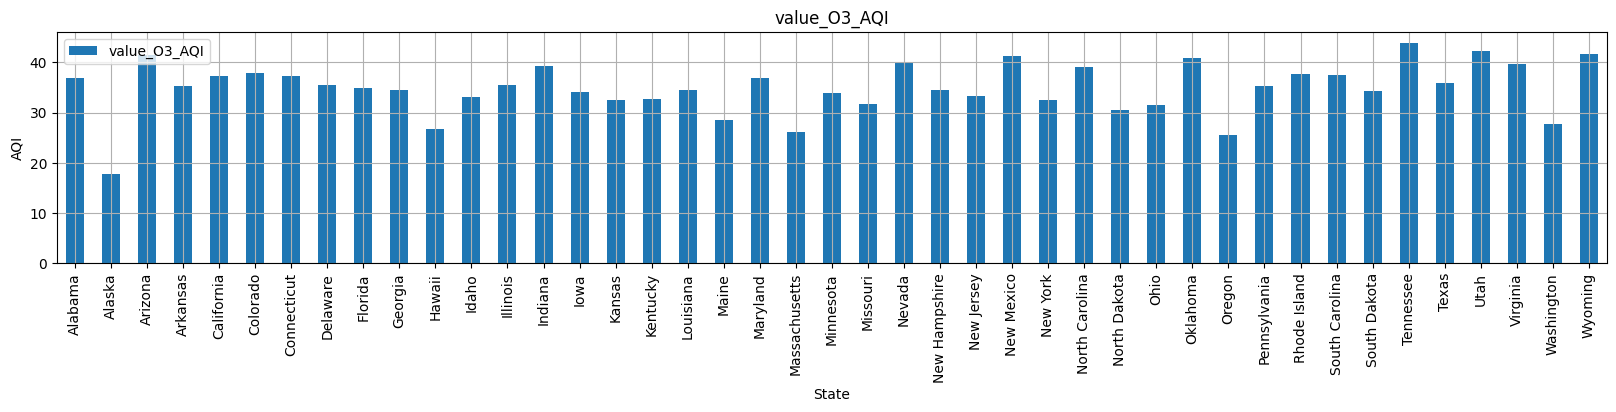

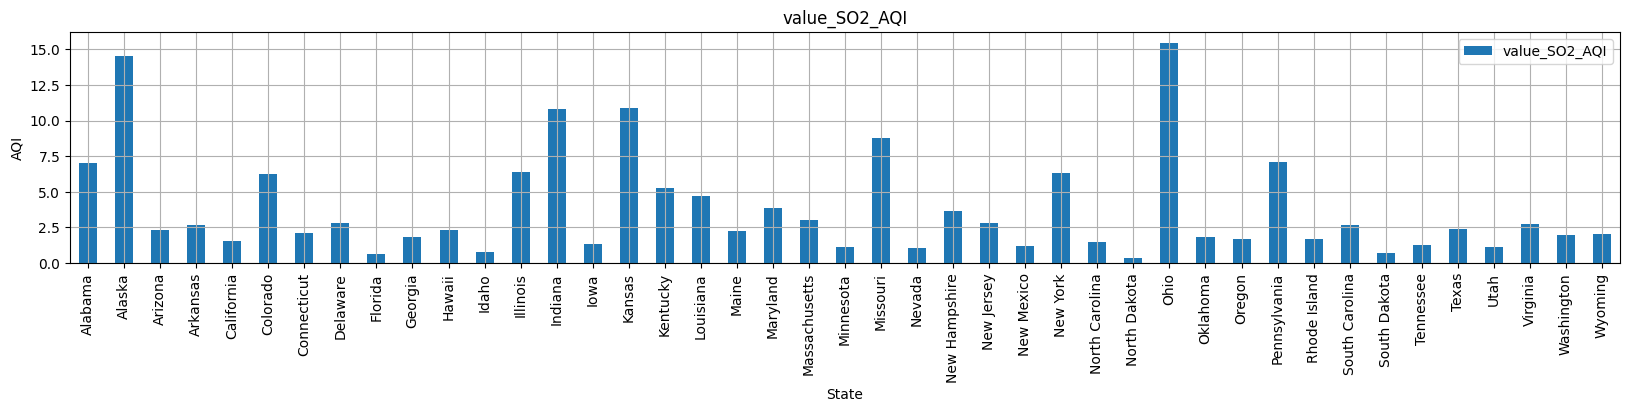

In [28]:
pollutants2=list(statesummary2.columns[2:])

statesummary2.plot(x='State', y='value_Asthma Mortality', kind="bar", figsize=(20,3))
plt.title("Total National Asthma Mortality Over time")
plt.xlabel("State")
plt.ylabel("Sum of Mortality")
plt.grid()

for pol in pollutants2:
    statesummary2.plot(x='State', y=pol, kind="bar", figsize=(20,3))
    plt.title(pol)
    plt.xlabel("State")
    plt.ylabel("AQI")
    plt.grid()

In [29]:
# Select only numeric columns
numeric_columns = statesummary2.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
corr = numeric_columns.corr()

# Display the correlation matrix with a color gradient
corr.style.background_gradient()

<ipython-input-30-edff96d2f44e>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


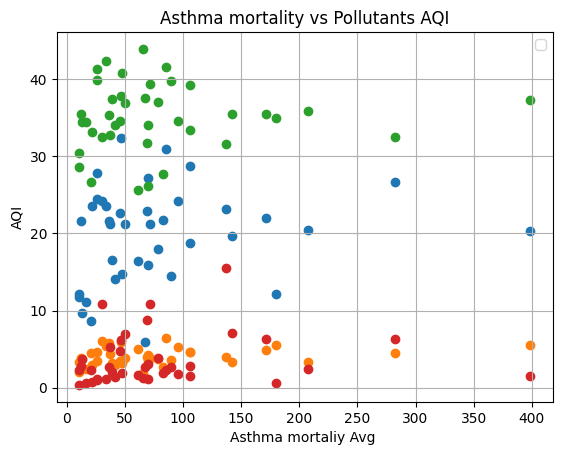

In [30]:
# Plot national pollutant AQIs avg 2010-2016
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_NO2_AQI'], marker='o' )
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_CO_AQI'], marker='o' )
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_O3_AQI'], marker='o' )
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_SO2_AQI'], marker='o')


plt.title("Asthma mortality vs Pollutants AQI")
plt.xlabel("Asthma mortaliy Avg ")
plt.ylabel("AQI")
plt.grid()

plt.legend(loc="best")